# Predicting whether a person has Diabetes or not

The data comprises of 9 columns and 768 observations. 8 columns are numerical attributes related to Diabetes. The last column is the Status of the patient, "1" indicates presence of Diabetes and vice versa. The intent is to predict whether the patient has Diabetes based on 8 variables.

### Let's perform EDA first

#### Step 1: Download all the libraries which we generally use while performing EDA

In [1]:
# Loading the necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import statsmodels.api as sm

#### Step 2: Import the data set on which EDA has to be performed

In [2]:
dataset = pd.read_csv('diabetes.csv')

#### Step 3: Analyse the dataset and get to know which type of problem it is
    a. We are performing EDA on Predicting Diabetes dataset.
    b. As the name suggests, the main intention of building a model on Predicting Diabetes dataset is to predict whether a person has Diabetes.
    c. This is a classification problem with two classes, "1", which indicates presence of Diabetes, and another for "0", which indicates no Diabetes.

#### Step 4: Fetch a few rows to get a gist of the attributes in the data set, whether there are any attributes which are not adding value to the target variable, etc.

In [3]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##### By looking at the data, we can say that none of the columns are irrelavent. However a few attributes other than outcome also have zero values, which is not expected. We may have to update those values in further steps.

#### Step 5: Get to know the structure of the data set using 'info()'method.

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


##### As we have already noticed, all the columns are numerical and none of the columns have null values. But, instead of null values we have zero values. So, we have to fix them.

#### Step 6: Get the 6-point summary using 'describe()' method.

In [5]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


##### By looking at the data above we can say that:
    a. First six attributes('Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI') have  zero values. Among these attributes, we can accept zero values only in the 'Pregnancies' attribute. Zero    values in all other attributes have to be considered as null values and fixed.
    b. Apart from the target variable, 'Insulin' and 'DiabetesPedigreeFunction' attributes are skewed. Other    attributes are distributed normally. 

#### Step 7: Since there are many missing values, let's perform missing value treatment first and then perform Univariate analysis

##### Since the missing values in the dataset are encoded with zeroes, we have to convert the zero values to null values and then fix them. All the attributes with null values are continuous. So, it is better to replace them with Median.

In [6]:
# Columns in which zeroes are not accepted
zero_not_accepted = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']

for column in zero_not_accepted:
    dataset[column] = dataset[column].replace(0, np.NaN)
    print("Number of null values in", column, "is:", dataset[column].isna().sum())
    # Calculating median of all the non-blank values
    median = int(dataset[column].median(skipna=True))
    dataset[column] = dataset[column].replace(np.NaN, median)

Number of null values in Glucose is: 5
Number of null values in BloodPressure is: 35
Number of null values in SkinThickness is: 227
Number of null values in BMI is: 11
Number of null values in Insulin is: 374


#### Step 8: Let's perform Univariate analysis

##### Among the attributes, 'Outcome' is discrete and the rest are numerical. For 'Outcome' we can check how the spread is. For rest of them, we can check how the distribution is.

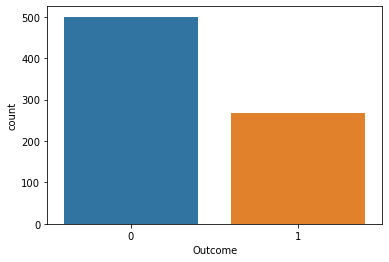

In [7]:
sns.countplot(x = 'Outcome', data = dataset)
plt.show()

In [8]:
dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

##### By looking at the plot and values above, we can say that target variable doesn't have much of imbalance. The spread is somewhere around 2:1 for 'Diabetic' and 'Non-Diabetic' classes respectively.

In [9]:
def dist_plot(var):
    # loop to plot graphs of all the attributes one after the other
    for i in var:
        
        # fetch feature 
        var = dataset[i]
    
        # visualize
        plt.figure(figsize=(12,3))
        sns.distplot(var,fit=norm)

/Users/Surya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/Surya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/Surya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

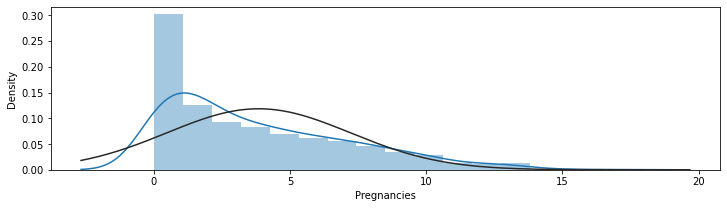

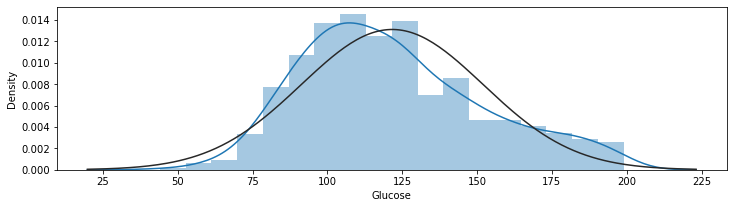

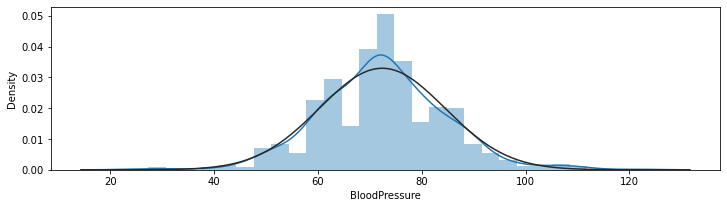

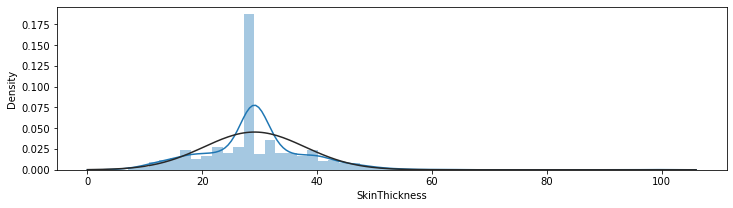

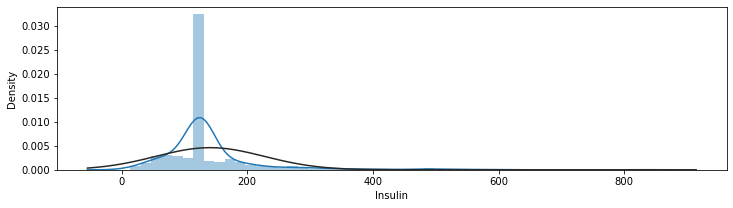

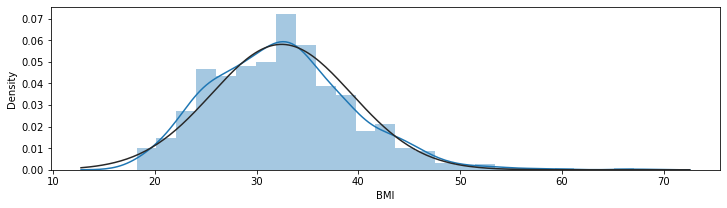

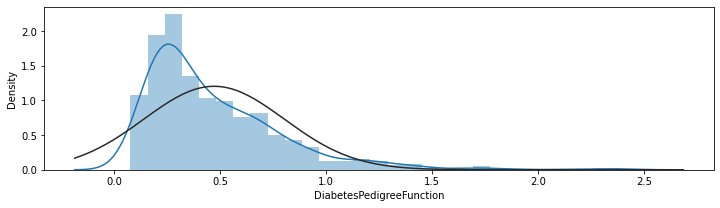

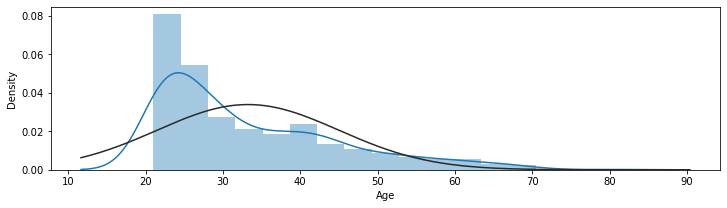

In [10]:
# Declaring continuous attributes
continuous_attributes = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

# Calling the function by passing continuous attributes
dist_plot(continuous_attributes)

##### By looking at the graphs above, we can say that:
    a. "Glucose", "BloodPressure" and "BMI" attributes are following approximate Normal distribution
    b. "Pregnancies", "DiabetesPedigreeFunction" and "Age" attributes are right skewed
    c. "SkinThickness" and "Insulin" attributes have a huge bump near the Median. But, this is expeceted since  these attributes had more than 30 percent of null values and we have all of them with with Median.

#### Step 9: Outlier treatment. We perfrm Outlier treatment when the dataset is huge or when we have unreal values. By looking at the max values in each of the continuous attribute, we can say that there are no unreal values in the dataset. So, we can skip Outlier treatment as of now.

#### Step 10: Let's remove Duplicates if there are any

In [11]:
# Check for duplicates
duplicate = dataset[dataset.duplicated()]

# This will fetch rows which are duplicate. As seen below, there are no duplicate rows in the Dataframe.
duplicate

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


##### Since we don't have any duplicates, we can proceed with Bivariate analysis

#### Step 11: Let's perform Bivariate analysis

#### By looking at the attributes, we can say that there is no scope for Multi-collinearity problem. So, we can skip the Multi-collinearity check as of now.

#### Let's check whether any of the independent variables have discriminatory ability interms of target variable by taking mean & median as a measure and by plotting box plots

In [12]:
dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,110.682000,70.920000,27.726000,127.792000,30.880200,0.429734,31.190000
1,4.865672,142.130597,75.123134,31.686567,164.701493,35.381343,0.550500,37.067164


In [13]:
dataset.groupby('Outcome').median()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,2,107.5,72.0,29.0,125.0,30.40,0.336,27
1,4,140.0,74.0,29.0,125.0,34.25,0.449,36


##### By analysing Mean and Median values of Independent attributes for normal and abnormal classes, we can say that below variables are showing good discriminatory ability:
    a. Pregnancies
    b. Glucose
    c. Insulin
    d. DiabetesPedigreeFunction
    
Since we have replaced huge number of Null values in 'SkinThickness' and 'Insulin', we cannot consider Median to analyse those attributes. In this case we can consider Mean values for analysis.

#### Let's plot Box plot to confirm the same

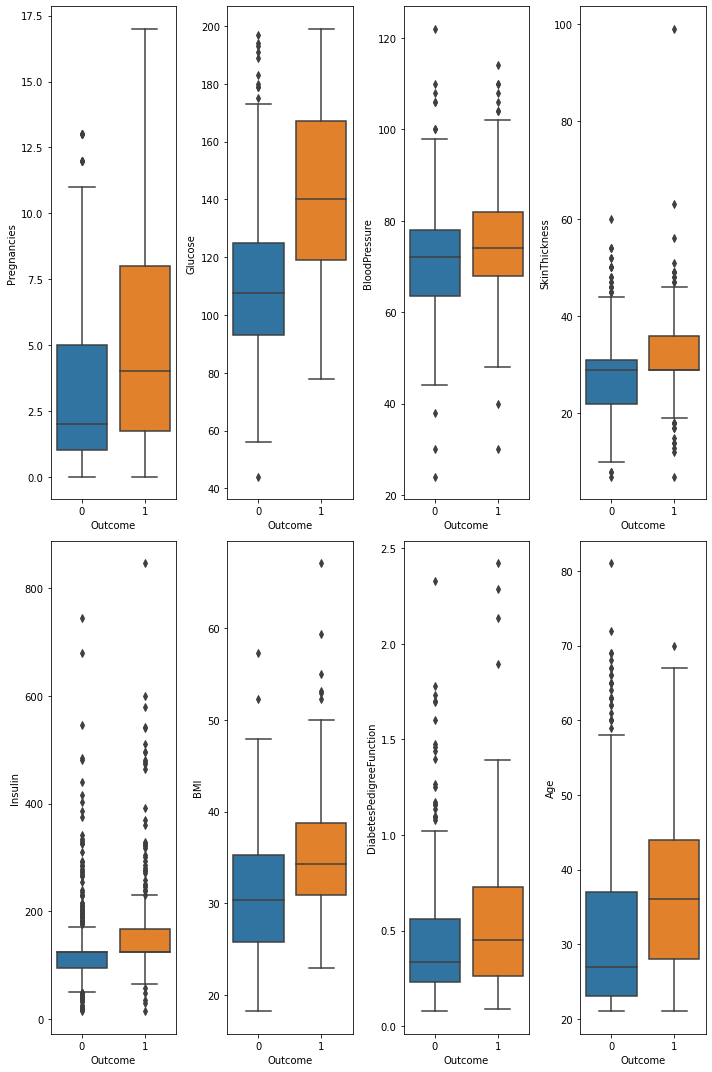

In [14]:
# Generating 2*4 matrix of box plots
fig, axes = plt.subplots(2, 4, figsize = (10,15))
axes = axes.flatten()

for i in range(0,len(dataset.columns)-1):
    sns.boxplot(x="Outcome", y=dataset.iloc[:,i], data=dataset, orient='v', ax=axes[i])

plt.tight_layout()
plt.show()

##### By looking at the Box plots above, we can confirm that the four variables('Pregnancies', 'Glucose', 'Insulin' and 'DiabetesPedigreeFunction') are showing good discriminatory ability.

#### To check whether there's any Linear Seperability, let's plot six scatter plots, each with two independent variables and target variable.

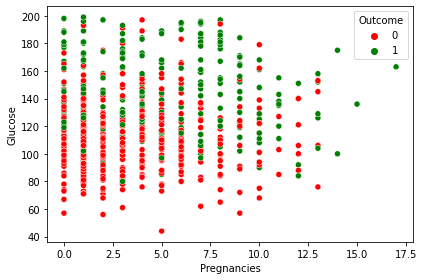

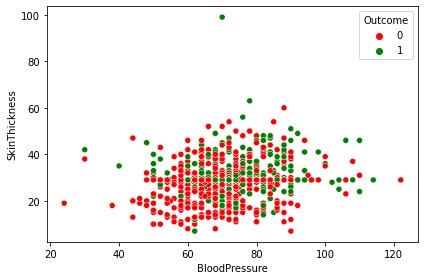

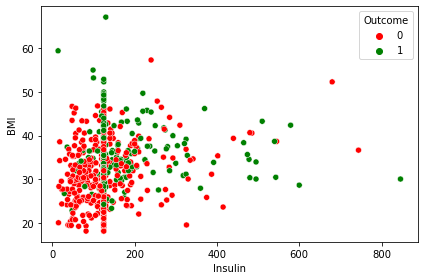

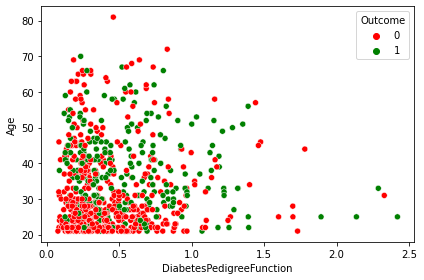

In [15]:
for i in range(0, int((len(dataset.columns)-1)/2)):
    ax = sns.scatterplot(x=dataset.iloc[:,(2*i)], y=dataset.iloc[:,(2*i)+1], hue = "Outcome", data = dataset, palette =['red','green'])
    plt.tight_layout()
    plt.show()

##### By analysing the graphs above, we can say that apart from 'Glucose', 'Insulin' and 'DiabetesPedigreeFunction' none of the attributes are showing much of discriminatory ability. Now that we have completed EDA, let's start with model building steps.

### Let's start with model building steps.

#### Step 1: Let's divide Independent and target variables to X and Y respectively

In [16]:
X = dataset.loc[:, dataset.columns != "Outcome"]
y = dataset.loc[:, dataset.columns == "Outcome"]

#### Step 2: Let's split Train data and Test data

##### Along with splitting Train data and Test data, let's perform scaling. To perform all these operations at once, let's write a function. 

In [17]:
def data_preprocess(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.2, random_state=0)
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler(copy=True, with_mean=True, with_std=True)

    scaler.fit(X_train)

    # Now apply the transformations to the data:
    train_scaled = scaler.transform(X_train)
    test_scaled = scaler.transform(X_test)
    return(train_scaled, test_scaled, y_train, y_test)

In [18]:
X_train_scaled, X_test_scaled, y_train, y_test = data_preprocess(X,y)

#### Step 3: Let's build the KNN model

##### Before building the model, let's decide the 'K' value. Let's fetch the size of train data and test data

In [19]:
print("Size of Train data is:", len(y_train))
print("Size of Test data is:", len(y_test))

Size of Train data is: 614
Size of Test data is: 154


##### Usually we consider root value of Test data as 'K'. Square root of 154 comes around 12.40. We have to consider an odd value in this case because we have only two classes. Let's build models with K=13 and K=11 and see which one gives us better results. Let's start with K=13

In [20]:
# Define the model: Init K-NN
# Here 'p' represents number of classes in the target variable
classifier = KNeighborsClassifier(n_neighbors=13, p=2, metric='euclidean')

In [21]:
# Fit Model
classifier.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=13)

In [22]:
# Let's predict the train set results
y_pred_train = classifier.predict(X_train_scaled)
y_pred_train

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [23]:
# Let's predict the test set results
y_pred_test = classifier.predict(X_test_scaled)
y_pred_test

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

#### Step 4: Let's validate the results

##### Based on the data we have, we can figure out that two metrics are important to evaluate the model:
    a. Recall(Class-1): This is the most important metric because if the patient has diabetes, he/she is going  to take the measures such as having minimal sugar in the food, stop having food which constitute rice and   refined flour, consuming drugs etc.
    b. precision(Class-0): This is second most important metric because if the patient doesn't have diabetes but predicted otherwise, Patient will have to consume drugs unnecessarily which may have side effects.

In [24]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85       393
           1       0.76      0.64      0.69       221

    accuracy                           0.80       614
   macro avg       0.78      0.76      0.77       614
weighted avg       0.79      0.80      0.79       614



In [25]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       107
           1       0.73      0.64      0.68        47

    accuracy                           0.82       154
   macro avg       0.79      0.77      0.78       154
weighted avg       0.81      0.82      0.81       154



##### By looking at the values above, we can say that we have built a average model. Though the Precision for Class-0 is greater than 0.8, Recall for Class-1 is way below 0.8. This may be because, we have replaced 30-50% of null values to Median in 'SkinThickness' and 'Insulin' attributes. 'Insulin is one of the main parameters while predicting diabetes.

##### Let's build a model with K=11 and see whether we get better results.

#### Step 5: Let's build the KNN model with K=11

In [26]:
# Define the model: Init K-NN
# Here 'p' represents number of classes in the target variable
classifier = KNeighborsClassifier(n_neighbors=11, p=2, metric='euclidean')

In [27]:
# Fit Model
classifier.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [28]:
# Let's predict the train set results
y_pred_train = classifier.predict(X_train_scaled)
y_pred_train

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,

In [29]:
# Let's predict the test set results
y_pred_test = classifier.predict(X_test_scaled)
y_pred_test

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

#### Step 6: Let's validate the results

In [30]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       393
           1       0.74      0.66      0.70       221

    accuracy                           0.80       614
   macro avg       0.78      0.77      0.77       614
weighted avg       0.79      0.80      0.79       614



In [31]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       107
           1       0.78      0.66      0.71        47

    accuracy                           0.84       154
   macro avg       0.82      0.79      0.80       154
weighted avg       0.83      0.84      0.83       154



##### By looking at the values above, we can say that this model has also given us similar results.

### Now that we haven't built a decent model yet, let's remove records with null values and build model and see whether we get better results.

#### Step 1: Let's load the dataset

In [32]:
dataset_reload = pd.read_csv('../Downloads/diabetes.csv')

#### Step 2: Let's replace zeroes with null in the columns where it is not acceptable and remove rows with null values

In [33]:
# Columns in which zeroes are not accepted
zero_not_accepted = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']

for column in zero_not_accepted:
    dataset_reload[column] = dataset_reload[column].replace(0, np.NaN)
    print("Number of null values in", column, "is:", dataset_reload[column].isna().sum())
    
dataset_new = dataset_reload.dropna()

Number of null values in Glucose is: 5
Number of null values in BloodPressure is: 35
Number of null values in SkinThickness is: 227
Number of null values in BMI is: 11
Number of null values in Insulin is: 374


In [34]:
dataset_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 3 to 765
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               392 non-null    int64  
 1   Glucose                   392 non-null    float64
 2   BloodPressure             392 non-null    float64
 3   SkinThickness             392 non-null    float64
 4   Insulin                   392 non-null    float64
 5   BMI                       392 non-null    float64
 6   DiabetesPedigreeFunction  392 non-null    float64
 7   Age                       392 non-null    int64  
 8   Outcome                   392 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 30.6 KB


#### Step 3: Let's check the distribution of target variable

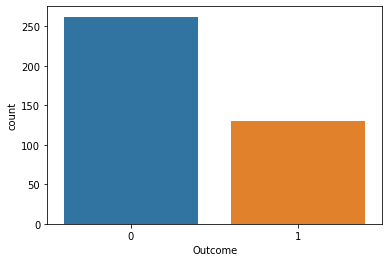

In [35]:
sns.countplot(x = 'Outcome', data = dataset_new)
plt.show()

In [36]:
dataset_new['Outcome'].value_counts()

0    262
1    130
Name: Outcome, dtype: int64

##### By looking at the values above we can say that even after removing null values, target variable doesn't have much of imbalance. The spread is somewhere around 2:1 for 'Diabetic' and 'Non-Diabetic' classes respectively.

#### Step 4: Let's divide Independent and target variables to X and Y respectively

In [37]:
X_new = dataset_new.loc[:, dataset_new.columns != "Outcome"]
y_new = dataset_new.loc[:, dataset_new.columns == "Outcome"]

#### Step 5: Let's split Train data and Test data using the function we have already written

In [38]:
X_train_scaled_new, X_test_scaled_new, y_train_new, y_test_new = data_preprocess(X_new,y_new)

#### Step 6: Let's build the KNN model

##### Before building the model, let's decide the 'K' value. Let's fetch the size of train data and test data

In [39]:
print("Size of Train data is:", len(y_train_new))
print("Size of Test data is:", len(y_test_new))

Size of Train data is: 313
Size of Test data is: 79


##### Usually we consider root value of Test data as 'K'. Square root of 79 comes close to 9. Let's build model with K=9 and see whether we get better results.

In [40]:
# Define the model: Init K-NN
# Here 'p' represents number of classes in the target variable
classifier = KNeighborsClassifier(n_neighbors=9, p=2, metric='euclidean')

In [41]:
# Fit Model
classifier.fit(X_train_scaled_new, y_train_new)

KNeighborsClassifier(metric='euclidean', n_neighbors=9)

In [42]:
# Let's predict the train set results
y_pred_train_new = classifier.predict(X_train_scaled_new)
y_pred_train_new

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [43]:
# Let's predict the test set results
y_pred_test_new = classifier.predict(X_test_scaled_new)
y_pred_test_new

array([1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

#### Step 6: Let's validate the results

In [44]:
print(classification_report(y_train_new, y_pred_train_new))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       208
           1       0.75      0.59      0.66       105

    accuracy                           0.80       313
   macro avg       0.78      0.74      0.76       313
weighted avg       0.79      0.80      0.79       313



In [45]:
print(classification_report(y_test_new, y_pred_test_new))

              precision    recall  f1-score   support

           0       0.79      0.93      0.85        54
           1       0.75      0.48      0.59        25

    accuracy                           0.78        79
   macro avg       0.77      0.70      0.72        79
weighted avg       0.78      0.78      0.77        79



##### By looking at the values above, we can say that this model has also given us the worst results. Recall value for Class-1 is the worst we can expect. So, we can confirm that the problem is not with replacing null values to Median.

##### By comparing results of all the KNN models we have built, we can conclude that the second KNN model with K=11 has given us better results. At this point, we have to check whether other classification models give better results. If no, it is better to stick with the KNN model and vice versa.